# Merging the Data and Storing in a Database/Visualizing Data

### You can submit a Jupyter Notebook or a PDF of your code. If you submit a .py file you need to also include a PDF or attachment of your results.

## Import Libraries

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import json
import sqlite3 # provides an API that will be needed to create a database

# magic function to include matplotlib graphs in notebook
%matplotlib inline

### Now that you have cleaned and transformed your 3 datasets, you need to load them into a database. You can choose what kind of database (SQLLite or MySQL, Postgre SQL are all free options). 

### You will want to load each dataset into SQL Lite as an individual table and then you must join the datasets together in Python into 1 dataset.

### CREATE INDIVIDUAL TABLE - Milestone 2: Cleaning/Formatting Flat File/CSV Source (primary key = Team)

In [190]:
# CREATE DATAFRAME: Reads the baseball csv file with pandas read_excel function
DF_BB_EXCEL = pd.read_excel("MLB_TeamStandardBatting_2012_2021.xlsx")
DF_BB_EXCEL

,Year,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
0,2012,Arizona Diamondbacks,48,28.3,4.53,162,6150,5462,734,1416,...,0.418,0.746,99,2284,108,41,61,45.0,47.0,1122.0
1,2012,Atlanta Braves,41,28.4,4.32,162,6126,5425,700,1341,...,0.389,0.709,90,2111,108,34,53,46.0,37.0,1127.0
2,2012,Baltimore Orioles,52,28.0,4.40,162,6160,5560,712,1375,...,0.417,0.728,97,2319,152,50,38,30.0,24.0,1027.0
3,2012,Boston Red Sox,56,29.4,4.53,162,6166,5604,734,1459,...,0.415,0.730,96,2325,105,45,34,55.0,27.0,1076.0
4,2012,Chicago Cubs,53,27.8,3.78,162,5967,5411,613,1297,...,0.378,0.680,83,2045,125,43,42,24.0,29.0,1044.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,2021,Tampa Bay Rays,61,27.7,5.33,155,5952,5275,826,1276,...,0.427,0.747,111,2250,68,70,6,39.0,27.0,1012.0
306,2021,Texas Rangers,54,26.8,3.81,155,5690,5169,591,1192,...,0.373,0.666,83,1927,108,58,16,31.0,10.0,943.0
307,2021,Toronto Blue Jays,62,26.8,5.18,155,5810,5232,803,1385,...,0.462,0.792,114,2415,110,49,10,35.0,14.0,999.0
308,2021,Washington Nationals,59,28.8,4.52,155,5842,5154,701,1336,...,0.421,0.758,108,2170,149,82,38,30.0,40.0,1109.0


In [191]:
type(DF_BB_EXCEL) # double check type of DF_BB_EXCEL to ensure its a dataframe

pandas.core.frame.DataFrame

In [192]:
# UPDATE DATAFRAME: Replace Headers with more intuitive naming
dict = {'Year': 'Year',
        'Tm': 'Team',
        '#Bat': 'PlayersInGame',
        'BatAge': 'AverageBatterAge',
        'R/G' : 'RunsPerGame',
        'G': 'GamesPlayed',
        'W': 'Wins',
        'PA': "PlateAppearances",
        'AB': 'AtBat',
        'R': 'RunsScored',
        'H': 'Hits',
        '2B': 'Doubles',
        '3B': 'Triples',
        'HR': 'HomeRuns',
        'RBI': 'RunsBattedIn',
        'SB': 'StolenBases',
        'CS': 'CaughtSteeling',
        'BB': 'BasesOnBalls',
        'SO': 'StrikeOuts',
        'BA': 'BattingAverage',
        'OBP': 'OneBasePercentage',
        'SLG': 'SluggingPercentage',
        'OPS': 'OnBasePercentage',
        'OPS+': 'OnBasePlusSluggingPlus',
        'TB': 'TotalBases',
        'GDP': 'GroundIntoDoublePlay',
        'HBP': 'HitByPitch',
        'SH': 'SacrificeHit',
        'SF': 'SacrificeFly',
        'IBB': 'IntentionalBaseOnballs',
        'LOB': 'LeftOnBase'}
  
# call rename () method
DF_BB_EXCEL = DF_BB_EXCEL.rename(columns=dict)
  
# print Dataframe after rename columns
DF_BB_EXCEL

,Year,Team,PlayersInGame,AverageBatterAge,RunsPerGame,GamesPlayed,PlateAppearances,AtBat,RunsScored,Hits,...,SluggingPercentage,OnBasePercentage,OnBasePlusSluggingPlus,TotalBases,GroundIntoDoublePlay,HitByPitch,SacrificeHit,SacrificeFly,IntentionalBaseOnballs,LeftOnBase
0,2012,Arizona Diamondbacks,48,28.3,4.53,162,6150,5462,734,1416,...,0.418,0.746,99,2284,108,41,61,45.0,47.0,1122.0
1,2012,Atlanta Braves,41,28.4,4.32,162,6126,5425,700,1341,...,0.389,0.709,90,2111,108,34,53,46.0,37.0,1127.0
2,2012,Baltimore Orioles,52,28.0,4.40,162,6160,5560,712,1375,...,0.417,0.728,97,2319,152,50,38,30.0,24.0,1027.0
3,2012,Boston Red Sox,56,29.4,4.53,162,6166,5604,734,1459,...,0.415,0.730,96,2325,105,45,34,55.0,27.0,1076.0
4,2012,Chicago Cubs,53,27.8,3.78,162,5967,5411,613,1297,...,0.378,0.680,83,2045,125,43,42,24.0,29.0,1044.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,2021,Tampa Bay Rays,61,27.7,5.33,155,5952,5275,826,1276,...,0.427,0.747,111,2250,68,70,6,39.0,27.0,1012.0
306,2021,Texas Rangers,54,26.8,3.81,155,5690,5169,591,1192,...,0.373,0.666,83,1927,108,58,16,31.0,10.0,943.0
307,2021,Toronto Blue Jays,62,26.8,5.18,155,5810,5232,803,1385,...,0.462,0.792,114,2415,110,49,10,35.0,14.0,999.0
308,2021,Washington Nationals,59,28.8,4.52,155,5842,5154,701,1336,...,0.421,0.758,108,2170,149,82,38,30.0,40.0,1109.0


### Create a Database

In [193]:
# CREATE DATABASE: Use the connect() function of sqlite3 to create a database, it will create a connection object
conn = sqlite3.connect('baseball.db') 
c = conn.cursor()

### Create a Table

In [194]:
# CREATE TABLE: EXCEL_BB, Use cursor.execute() method to write the CREATE TABLE query within triple commas
# INTEGER (a whole number), REAL (floating point number), and TEXT (a string of text). 
c.execute('''CREATE TABLE IF NOT EXISTS EXCEL_BB
              (Year INT, Team TEXT, PlayersInGame INT, AverageBatterAge INT, RunsPerGame INT, GamesPlayed INT, 
              PlateAppearances INT, AtBat INT, RunsScored INT, Hits INT, Doubles INT, HomeRuns INT, RunsBattedIn INT, 
              StolenBases INT, CaughtSteeling INT, BasesOnBalls INT, StrikeOuts INT, 
              BattingAverage REAL, OneBasePercentage REAL, SluggingPercentage REAL, OnBasePercentage REAL, 
              TotalBases INT, GroundIntoDoublePlay INT, HitByPitch INT, SacrificeHit INT, 
              SacrificeFly INT, IntentionalBaseOnballs INT, LeftOnBase INT)''')
conn.commit()

# https://mungingdata.com/sqlite/create-database-load-csv-python/
# https://appdividend.com/2020/10/14/how-to-create-sqlite-database-in-python/

### Get from Pandas DataFrame to SQL 

In [195]:
# WRITE DATAFRAME TO SQLLITE TABLE 
DF_BB_EXCEL.to_sql('EXCEL_BB', conn, if_exists='replace', index = False)

In [196]:
# VIEW THE TABLE IN THE DATABASE: 
c.execute('''  
SELECT * FROM EXCEL_BB
          ''')

for row in c.fetchall():
    print (row)

(2012, 'Arizona Diamondbacks', 48, 28.3, 4.53, 162, 6150, 5462, 734, 1416, 307, 33, 165, 710, 93, 51, 539, 1266, 0.259, 0.328, 0.418, 0.746, 99, 2284, 108, 41, 61, 45.0, 47.0, 1122.0)
(2012, 'Atlanta Braves', 41, 28.4, 4.32, 162, 6126, 5425, 700, 1341, 263, 30, 149, 660, 101, 32, 567, 1289, 0.247, 0.32, 0.389, 0.709, 90, 2111, 108, 34, 53, 46.0, 37.0, 1127.0)
(2012, 'Baltimore Orioles', 52, 28.0, 4.4, 162, 6160, 5560, 712, 1375, 270, 16, 214, 677, 58, 29, 480, 1315, 0.247, 0.311, 0.417, 0.728, 97, 2319, 152, 50, 38, 30.0, 24.0, 1027.0)
(2012, 'Boston Red Sox', 56, 29.4, 4.53, 162, 6166, 5604, 734, 1459, 339, 16, 165, 695, 97, 31, 428, 1197, 0.26, 0.315, 0.415, 0.73, 96, 2325, 105, 45, 34, 55.0, 27.0, 1076.0)
(2012, 'Chicago Cubs', 53, 27.8, 3.78, 162, 5967, 5411, 613, 1297, 265, 36, 137, 570, 94, 45, 447, 1235, 0.24, 0.302, 0.378, 0.68, 83, 2045, 125, 43, 42, 24.0, 29.0, 1044.0)
(2012, 'Chicago White Sox', 45, 30.0, 4.62, 162, 6111, 5518, 748, 1409, 228, 29, 211, 726, 109, 43, 461, 120

### CREATE INDIVIDUAL TABLE - Milestone 3: Cleaning/Formatting Website Data (primary key = Highest Team Name or Lowest Team Name)

In [197]:
# Capture the HTML baseball data and payroll from the baseball cube website
url_BB = "http://www.thebaseballcube.com/topics/payrolls/"
list_of_df_BB = pd.read_html(url_BB, header=0)
df_BB = list_of_df_BB[0] 
df_BB.head()

,Year,Total Payroll,League Min,Avg Salary,Player Count,Team Count,Top Salary,Highest Payroll,Lowest Payroll,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,2019,"$ 4,007,869,480","$ 555,000","$ 4,509,524",1448,30,"Max Scherzer ($42,142,857)","Boston Red Sox ($222,171,123)","Tampa Bay Rays ($60,444,931)",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,"$ 4,141,041,635","$ 545,000","$ 4,095,686",1384,30,"Mike Trout ($33,250,000)","Boston Red Sox ($235,649,368)","Oakland Athletics ($68,534,631)",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,"$ 3,878,284,045","$ 535,000","$ 4,097,122",1363,30,"Clayton Kershaw ($33,000,000)","Los Angeles Dodgers ($187,989,811)","San Diego Padres ($34,574,400)",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,"$ 3,937,842,897","$ 507,500","$ 3,966,020",1358,30,"Clayton Kershaw ($32,000,000)","Los Angeles Dodgers ($253,639,162)","Milwaukee Brewers ($62,964,319)",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,"$ 3,658,284,542","$ 507,500","$ 3,952,252",1358,30,"Clayton Kershaw ($31,000,000)","Los Angeles Dodgers ($230,352,402)","Arizona Diamondbacks ($65,770,333)",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
# Remove column headers 9-49 as the information is NaN
BB_columns = df_BB.dropna(axis=1)
df_BB_columns = pd.DataFrame(BB_columns)
df_BB_columns.head()

,Year,Total Payroll,League Min,Avg Salary,Player Count,Team Count,Top Salary,Highest Payroll,Lowest Payroll
0,2019,"$ 4,007,869,480","$ 555,000","$ 4,509,524",1448,30,"Max Scherzer ($42,142,857)","Boston Red Sox ($222,171,123)","Tampa Bay Rays ($60,444,931)"
1,2018,"$ 4,141,041,635","$ 545,000","$ 4,095,686",1384,30,"Mike Trout ($33,250,000)","Boston Red Sox ($235,649,368)","Oakland Athletics ($68,534,631)"
2,2017,"$ 3,878,284,045","$ 535,000","$ 4,097,122",1363,30,"Clayton Kershaw ($33,000,000)","Los Angeles Dodgers ($187,989,811)","San Diego Padres ($34,574,400)"
3,2016,"$ 3,937,842,897","$ 507,500","$ 3,966,020",1358,30,"Clayton Kershaw ($32,000,000)","Los Angeles Dodgers ($253,639,162)","Milwaukee Brewers ($62,964,319)"
4,2015,"$ 3,658,284,542","$ 507,500","$ 3,952,252",1358,30,"Clayton Kershaw ($31,000,000)","Los Angeles Dodgers ($230,352,402)","Arizona Diamondbacks ($65,770,333)"


In [199]:
# Change "Highest Payroll" and "Lowest Payroll" to "Highest Team Payroll" and "Lowest Team Payroll"
df_BB_columns = df_BB_columns.rename(columns={'Highest Payroll':'Highest Team Payroll', 'Lowest Payroll': 'Lowest Team Payroll'})
df_BB_columns.head()

,Year,Total Payroll,League Min,Avg Salary,Player Count,Team Count,Top Salary,Highest Team Payroll,Lowest Team Payroll
0,2019,"$ 4,007,869,480","$ 555,000","$ 4,509,524",1448,30,"Max Scherzer ($42,142,857)","Boston Red Sox ($222,171,123)","Tampa Bay Rays ($60,444,931)"
1,2018,"$ 4,141,041,635","$ 545,000","$ 4,095,686",1384,30,"Mike Trout ($33,250,000)","Boston Red Sox ($235,649,368)","Oakland Athletics ($68,534,631)"
2,2017,"$ 3,878,284,045","$ 535,000","$ 4,097,122",1363,30,"Clayton Kershaw ($33,000,000)","Los Angeles Dodgers ($187,989,811)","San Diego Padres ($34,574,400)"
3,2016,"$ 3,937,842,897","$ 507,500","$ 3,966,020",1358,30,"Clayton Kershaw ($32,000,000)","Los Angeles Dodgers ($253,639,162)","Milwaukee Brewers ($62,964,319)"
4,2015,"$ 3,658,284,542","$ 507,500","$ 3,952,252",1358,30,"Clayton Kershaw ($31,000,000)","Los Angeles Dodgers ($230,352,402)","Arizona Diamondbacks ($65,770,333)"


In [200]:
# Remove rows 20 and 33 as they do not contain data
df_BB_columns = df_BB_columns.drop(df_BB_columns.index[[20,33]])
df_BB_columns.head()

,Year,Total Payroll,League Min,Avg Salary,Player Count,Team Count,Top Salary,Highest Team Payroll,Lowest Team Payroll
0,2019,"$ 4,007,869,480","$ 555,000","$ 4,509,524",1448,30,"Max Scherzer ($42,142,857)","Boston Red Sox ($222,171,123)","Tampa Bay Rays ($60,444,931)"
1,2018,"$ 4,141,041,635","$ 545,000","$ 4,095,686",1384,30,"Mike Trout ($33,250,000)","Boston Red Sox ($235,649,368)","Oakland Athletics ($68,534,631)"
2,2017,"$ 3,878,284,045","$ 535,000","$ 4,097,122",1363,30,"Clayton Kershaw ($33,000,000)","Los Angeles Dodgers ($187,989,811)","San Diego Padres ($34,574,400)"
3,2016,"$ 3,937,842,897","$ 507,500","$ 3,966,020",1358,30,"Clayton Kershaw ($32,000,000)","Los Angeles Dodgers ($253,639,162)","Milwaukee Brewers ($62,964,319)"
4,2015,"$ 3,658,284,542","$ 507,500","$ 3,952,252",1358,30,"Clayton Kershaw ($31,000,000)","Los Angeles Dodgers ($230,352,402)","Arizona Diamondbacks ($65,770,333)"


In [201]:
# Split column data: Highest Payroll, Lowest Payroll and Top Salary
df_BB_columns[['Highest Team Name','Highest Team Payroll']] = df_BB_columns['Highest Team Payroll'].str.split("$",expand=True,)
df_BB_columns[['Lowest Team Name','Lowest Team Payroll']] = df_BB_columns['Lowest Team Payroll'].str.split("$",expand=True,)
df_BB_columns[['Top Salary Player Name','Top Player Salary']] = df_BB_columns['Top Salary'].str.split("$",expand=True,)
df_BB_columns.head()

,Year,Total Payroll,League Min,Avg Salary,Player Count,Team Count,Top Salary,Highest Team Payroll,Lowest Team Payroll,Highest Team Name,Lowest Team Name,Top Salary Player Name,Top Player Salary
0,2019,"$ 4,007,869,480","$ 555,000","$ 4,509,524",1448,30,"Max Scherzer ($42,142,857)","222,171,123)","60,444,931)",Boston Red Sox (,Tampa Bay Rays (,Max Scherzer (,"42,142,857)"
1,2018,"$ 4,141,041,635","$ 545,000","$ 4,095,686",1384,30,"Mike Trout ($33,250,000)","235,649,368)","68,534,631)",Boston Red Sox (,Oakland Athletics (,Mike Trout (,"33,250,000)"
2,2017,"$ 3,878,284,045","$ 535,000","$ 4,097,122",1363,30,"Clayton Kershaw ($33,000,000)","187,989,811)","34,574,400)",Los Angeles Dodgers (,San Diego Padres (,Clayton Kershaw (,"33,000,000)"
3,2016,"$ 3,937,842,897","$ 507,500","$ 3,966,020",1358,30,"Clayton Kershaw ($32,000,000)","253,639,162)","62,964,319)",Los Angeles Dodgers (,Milwaukee Brewers (,Clayton Kershaw (,"32,000,000)"
4,2015,"$ 3,658,284,542","$ 507,500","$ 3,952,252",1358,30,"Clayton Kershaw ($31,000,000)","230,352,402)","65,770,333)",Los Angeles Dodgers (,Arizona Diamondbacks (,Clayton Kershaw (,"31,000,000)"


In [202]:
# Clean up column data: remove open and closed parantheses on split columns
df_BB_columns['Highest Team Payroll'] = df_BB_columns['Highest Team Payroll'].str.replace(r"[),]",'')
df_BB_columns['Highest Team Payroll'] = df_BB_columns['Highest Team Payroll'].astype(int)
df_BB_columns['Lowest Team Payroll'] = df_BB_columns['Lowest Team Payroll'].str.replace(r"[),]",'')
df_BB_columns['Lowest Team Payroll'] = df_BB_columns['Lowest Team Payroll'].astype(int)
df_BB_columns['Highest Team Name'] = df_BB_columns['Highest Team Name'].str.replace(r"[(]",'')
df_BB_columns['Lowest Team Name'] = df_BB_columns['Lowest Team Name'].str.replace(r"[(]",'')
df_BB_columns['Top Salary Player Name'] = df_BB_columns['Top Salary Player Name'].str.replace(r"[(]",'')
df_BB_columns['Top Player Salary'] = df_BB_columns['Top Player Salary'].str.replace(r"[),]",'')
df_BB_columns['Top Player Salary'] = df_BB_columns['Top Player Salary'].astype(int)

df_BB_columns.head(10)

,Year,Total Payroll,League Min,Avg Salary,Player Count,Team Count,Top Salary,Highest Team Payroll,Lowest Team Payroll,Highest Team Name,Lowest Team Name,Top Salary Player Name,Top Player Salary
0,2019,"$ 4,007,869,480","$ 555,000","$ 4,509,524",1448,30,"Max Scherzer ($42,142,857)",222171123,60444931,Boston Red Sox,Tampa Bay Rays,Max Scherzer,42142857
1,2018,"$ 4,141,041,635","$ 545,000","$ 4,095,686",1384,30,"Mike Trout ($33,250,000)",235649368,68534631,Boston Red Sox,Oakland Athletics,Mike Trout,33250000
2,2017,"$ 3,878,284,045","$ 535,000","$ 4,097,122",1363,30,"Clayton Kershaw ($33,000,000)",187989811,34574400,Los Angeles Dodgers,San Diego Padres,Clayton Kershaw,33000000
3,2016,"$ 3,937,842,897","$ 507,500","$ 3,966,020",1358,30,"Clayton Kershaw ($32,000,000)",253639162,62964319,Los Angeles Dodgers,Milwaukee Brewers,Clayton Kershaw,32000000
4,2015,"$ 3,658,284,542","$ 507,500","$ 3,952,252",1358,30,"Clayton Kershaw ($31,000,000)",230352402,65770333,Los Angeles Dodgers,Arizona Diamondbacks,Clayton Kershaw,31000000
5,2014,"$ 3,453,960,397","$ 500,000","$ 3,818,923",1324,30,"Zack Greinke ($28,000,000)",235295219,44544174,Los Angeles Dodgers,Houston Astros,Zack Greinke,28000000
6,2013,"$ 3,187,568,088","$ 490,000","$ 3,386,212",1313,30,"Alex Rodriguez ($29,000,000)",228995945,24328538,New York Yankees,Houston Astros,Alex Rodriguez,29000000
7,2012,"$ 2,940,657,192","$ 480,000","$ 3,213,479",1291,30,"Alex Rodriguez ($30,000,000)",197962289,55244700,New York Yankees,San Diego Padres,Alex Rodriguez,30000000
8,2011,"$ 2,786,161,291","$ 414,000","$ 3,095,183",1306,30,"Alex Rodriguez ($32,000,000)",202689028,36126000,New York Yankees,Kansas City Royals,Alex Rodriguez,32000000
9,2010,"$ 2,730,601,685","$ 400,000","$ 3,014,572",1256,30,"Alex Rodriguez ($33,000,000)",206333389,34943000,New York Yankees,Pittsburgh Pirates,Alex Rodriguez,33000000


In [203]:
#
df_BB_columns = df_BB_columns.rename(columns={'Highest Team Name': 'Team'})
df_BB_columns.head(10)

,Year,Total Payroll,League Min,Avg Salary,Player Count,Team Count,Top Salary,Highest Team Payroll,Lowest Team Payroll,Team,Lowest Team Name,Top Salary Player Name,Top Player Salary
0,2019,"$ 4,007,869,480","$ 555,000","$ 4,509,524",1448,30,"Max Scherzer ($42,142,857)",222171123,60444931,Boston Red Sox,Tampa Bay Rays,Max Scherzer,42142857
1,2018,"$ 4,141,041,635","$ 545,000","$ 4,095,686",1384,30,"Mike Trout ($33,250,000)",235649368,68534631,Boston Red Sox,Oakland Athletics,Mike Trout,33250000
2,2017,"$ 3,878,284,045","$ 535,000","$ 4,097,122",1363,30,"Clayton Kershaw ($33,000,000)",187989811,34574400,Los Angeles Dodgers,San Diego Padres,Clayton Kershaw,33000000
3,2016,"$ 3,937,842,897","$ 507,500","$ 3,966,020",1358,30,"Clayton Kershaw ($32,000,000)",253639162,62964319,Los Angeles Dodgers,Milwaukee Brewers,Clayton Kershaw,32000000
4,2015,"$ 3,658,284,542","$ 507,500","$ 3,952,252",1358,30,"Clayton Kershaw ($31,000,000)",230352402,65770333,Los Angeles Dodgers,Arizona Diamondbacks,Clayton Kershaw,31000000
5,2014,"$ 3,453,960,397","$ 500,000","$ 3,818,923",1324,30,"Zack Greinke ($28,000,000)",235295219,44544174,Los Angeles Dodgers,Houston Astros,Zack Greinke,28000000
6,2013,"$ 3,187,568,088","$ 490,000","$ 3,386,212",1313,30,"Alex Rodriguez ($29,000,000)",228995945,24328538,New York Yankees,Houston Astros,Alex Rodriguez,29000000
7,2012,"$ 2,940,657,192","$ 480,000","$ 3,213,479",1291,30,"Alex Rodriguez ($30,000,000)",197962289,55244700,New York Yankees,San Diego Padres,Alex Rodriguez,30000000
8,2011,"$ 2,786,161,291","$ 414,000","$ 3,095,183",1306,30,"Alex Rodriguez ($32,000,000)",202689028,36126000,New York Yankees,Kansas City Royals,Alex Rodriguez,32000000
9,2010,"$ 2,730,601,685","$ 400,000","$ 3,014,572",1256,30,"Alex Rodriguez ($33,000,000)",206333389,34943000,New York Yankees,Pittsburgh Pirates,Alex Rodriguez,33000000


In [204]:
df_BB_columns['Team'] = df_BB_columns['Team'].str.strip()
df_BB_columns.head(10)

,Year,Total Payroll,League Min,Avg Salary,Player Count,Team Count,Top Salary,Highest Team Payroll,Lowest Team Payroll,Team,Lowest Team Name,Top Salary Player Name,Top Player Salary
0,2019,"$ 4,007,869,480","$ 555,000","$ 4,509,524",1448,30,"Max Scherzer ($42,142,857)",222171123,60444931,Boston Red Sox,Tampa Bay Rays,Max Scherzer,42142857
1,2018,"$ 4,141,041,635","$ 545,000","$ 4,095,686",1384,30,"Mike Trout ($33,250,000)",235649368,68534631,Boston Red Sox,Oakland Athletics,Mike Trout,33250000
2,2017,"$ 3,878,284,045","$ 535,000","$ 4,097,122",1363,30,"Clayton Kershaw ($33,000,000)",187989811,34574400,Los Angeles Dodgers,San Diego Padres,Clayton Kershaw,33000000
3,2016,"$ 3,937,842,897","$ 507,500","$ 3,966,020",1358,30,"Clayton Kershaw ($32,000,000)",253639162,62964319,Los Angeles Dodgers,Milwaukee Brewers,Clayton Kershaw,32000000
4,2015,"$ 3,658,284,542","$ 507,500","$ 3,952,252",1358,30,"Clayton Kershaw ($31,000,000)",230352402,65770333,Los Angeles Dodgers,Arizona Diamondbacks,Clayton Kershaw,31000000
5,2014,"$ 3,453,960,397","$ 500,000","$ 3,818,923",1324,30,"Zack Greinke ($28,000,000)",235295219,44544174,Los Angeles Dodgers,Houston Astros,Zack Greinke,28000000
6,2013,"$ 3,187,568,088","$ 490,000","$ 3,386,212",1313,30,"Alex Rodriguez ($29,000,000)",228995945,24328538,New York Yankees,Houston Astros,Alex Rodriguez,29000000
7,2012,"$ 2,940,657,192","$ 480,000","$ 3,213,479",1291,30,"Alex Rodriguez ($30,000,000)",197962289,55244700,New York Yankees,San Diego Padres,Alex Rodriguez,30000000
8,2011,"$ 2,786,161,291","$ 414,000","$ 3,095,183",1306,30,"Alex Rodriguez ($32,000,000)",202689028,36126000,New York Yankees,Kansas City Royals,Alex Rodriguez,32000000
9,2010,"$ 2,730,601,685","$ 400,000","$ 3,014,572",1256,30,"Alex Rodriguez ($33,000,000)",206333389,34943000,New York Yankees,Pittsburgh Pirates,Alex Rodriguez,33000000


### Create a Table

In [205]:
# CREATE TABLE: EXCEL_BB, Use cursor.execute() method to write the CREATE TABLE query within triple commas
# INTEGER (a whole number), REAL (floating point number), and TEXT (a string of text). 
c.execute('''CREATE TABLE IF NOT EXISTS WEB_BB
              (Year INT, "Total Payroll" INT, "League Min" INT, "Avg Salary" INT, "Player Count" INT, "Team Count" INT, "Top Salary" INT, 
              "Highest Team Payroll" INT, "Lowest Team Payroll" INT, "Team" TEXT, "Lowest Team Name" TEXT,
              "Top Salary Player Name" TEXT, "Top Player Salary" INT)''')
conn.commit()

# https://mungingdata.com/sqlite/create-database-load-csv-python/
# https://appdividend.com/2020/10/14/how-to-create-sqlite-database-in-python/

### Get from Pandas DataFrame to SQL 

In [206]:
# WRITE DATAFRAME TO SQLLITE TABLE 
df_BB_columns.to_sql('WEB_BB', conn, if_exists='replace', index = False)

In [207]:
# VIEW THE TABLE IN THE DATABASE: 
c.execute('''  
SELECT * FROM WEB_BB
          ''')

for row in c.fetchall():
    print (row)

('2019', '$ 4,007,869,480', '$ 555,000', '$ 4,509,524', '1448', '30', 'Max Scherzer ($42,142,857)', 222171123, 60444931, 'Boston Red Sox', 'Tampa Bay Rays ', 'Max Scherzer ', 42142857)
('2018', '$ 4,141,041,635', '$ 545,000', '$ 4,095,686', '1384', '30', 'Mike Trout ($33,250,000)', 235649368, 68534631, 'Boston Red Sox', 'Oakland Athletics ', 'Mike Trout ', 33250000)
('2017', '$ 3,878,284,045', '$ 535,000', '$ 4,097,122', '1363', '30', 'Clayton Kershaw ($33,000,000)', 187989811, 34574400, 'Los Angeles Dodgers', 'San Diego Padres ', 'Clayton Kershaw ', 33000000)
('2016', '$ 3,937,842,897', '$ 507,500', '$ 3,966,020', '1358', '30', 'Clayton Kershaw ($32,000,000)', 253639162, 62964319, 'Los Angeles Dodgers', 'Milwaukee Brewers ', 'Clayton Kershaw ', 32000000)
('2015', '$ 3,658,284,542', '$ 507,500', '$ 3,952,252', '1358', '30', 'Clayton Kershaw ($31,000,000)', 230352402, 65770333, 'Los Angeles Dodgers', 'Arizona Diamondbacks ', 'Clayton Kershaw ', 31000000)
('2014', '$ 3,453,960,397', '$ 5

### CREATE INDIVIDUAL TABLE - Milestone 4: Cleaning/Formating API Data (primary key = Team Name)

In [208]:
! pip install MLB-StatsAPI 
# install API wrapper of https://appac.github.io/mlb-data-api-docs/


# https://betterprogramming.pub/using-the-mlb-stats-api-to-get-daily-data-88f48266656c
# https://github.com/toddrob99/MLB-StatsAPI/wiki/All-Functions#core-functions

In [209]:
import statsapi # import the stats api library

In [210]:
def get_division_standings(league, division): # created function to call the API and return a pandas dataframe of the MLB division standings
    standings = pd.DataFrame(statsapi.standings_data(league)[division]['teams'])
    standings = standings[['name', 'div_rank', 'gb', 'w', 'l', 'elim_num', 'wc_rank', 'wc_gb', 'wc_elim_num']]
    return standings

In [211]:
AML_WEST_DF = get_division_standings(103, 200) # division standings of MLB American West Division
AML_WEST_DF

,name,div_rank,gb,w,l,elim_num,wc_rank,wc_gb,wc_elim_num
0,Houston Astros,1,-,95,67,-,-,-,-
1,Seattle Mariners,2,5.0,90,72,E,4,2.0,E
2,Oakland Athletics,3,9.0,86,76,E,5,6.0,E
3,Los Angeles Angels,4,18.0,77,85,E,8,15.0,E
4,Texas Rangers,5,35.0,60,102,E,11,32.0,E


In [212]:
AML_EAST_DF = get_division_standings(103, 201) # division standings of MLB American East Division
AML_EAST_DF

,name,div_rank,gb,w,l,elim_num,wc_rank,wc_gb,wc_elim_num
0,Tampa Bay Rays,1,-,100,62,-,-,-,-
1,Boston Red Sox,2,8.0,92,70,E,1,-,-
2,New York Yankees,3,8.0,92,70,E,2,-,-
3,Toronto Blue Jays,4,9.0,91,71,E,3,1.0,E
4,Baltimore Orioles,5,48.0,52,110,E,12,40.0,E


In [213]:
AML_CENTRAL_DF = get_division_standings(103, 202) # division standings of MLB American Central Division
AML_CENTRAL_DF

,name,div_rank,gb,w,l,elim_num,wc_rank,wc_gb,wc_elim_num
0,Chicago White Sox,1,-,93,69,-,-,-,-
1,Cleveland Indians,2,13.0,80,82,E,6,12.0,E
2,Detroit Tigers,3,16.0,77,85,E,7,15.0,E
3,Kansas City Royals,4,19.0,74,88,E,9,18.0,E
4,Minnesota Twins,5,20.0,73,89,E,10,19.0,E


In [214]:
NL_WEST_DF = get_division_standings(104, 203) # division standings of MLB National West Division
NL_WEST_DF

,name,div_rank,gb,w,l,elim_num,wc_rank,wc_gb,wc_elim_num
0,San Francisco Giants,1,-,107,55,-,-,-,-
1,Los Angeles Dodgers,2,1.0,106,56,E,1,+16.0,-
2,San Diego Padres,3,28.0,79,83,E,5,11.0,E
3,Colorado Rockies,4,32.5,74,87,E,7,15.5,E
4,Arizona Diamondbacks,5,55.0,52,110,E,12,38.0,E


In [215]:
NL_EAST_DF = get_division_standings(104, 204) # division standings of MLB National East Division
NL_EAST_DF

,name,div_rank,gb,w,l,elim_num,wc_rank,wc_gb,wc_elim_num
0,Atlanta Braves,1,-,88,73,-,-,-,-
1,Philadelphia Phillies,2,6.5,82,80,E,4,8.0,E
2,New York Mets,3,11.5,77,85,E,6,13.0,E
3,Miami Marlins,4,21.5,67,95,E,9,23.0,E
4,Washington Nationals,5,23.5,65,97,E,10,25.0,E


In [216]:
NL_CENTRAL_DF = get_division_standings(104, 205) # division standings of MLB National Central Division
NL_CENTRAL_DF

,name,div_rank,gb,w,l,elim_num,wc_rank,wc_gb,wc_elim_num
0,Milwaukee Brewers,1,-,95,67,-,-,-,-
1,St. Louis Cardinals,2,5.0,90,72,E,2,-,-
2,Cincinnati Reds,3,12.0,83,79,E,3,7.0,E
3,Chicago Cubs,4,24.0,71,91,E,8,19.0,E
4,Pittsburgh Pirates,5,34.0,61,101,E,11,29.0,E


In [217]:
# Combine the dataframes into 1 larger dataframe
# https://datacarpentry.org/python-socialsci/11-joins/index.html
ALL_DIVS_DF = pd.concat([AML_WEST_DF, AML_EAST_DF, AML_CENTRAL_DF, NL_WEST_DF, NL_EAST_DF, NL_CENTRAL_DF])
ALL_DIVS_DF

,name,div_rank,gb,w,l,elim_num,wc_rank,wc_gb,wc_elim_num
0,Houston Astros,1,-,95,67,-,-,-,-
1,Seattle Mariners,2,5.0,90,72,E,4,2.0,E
2,Oakland Athletics,3,9.0,86,76,E,5,6.0,E
3,Los Angeles Angels,4,18.0,77,85,E,8,15.0,E
4,Texas Rangers,5,35.0,60,102,E,11,32.0,E
0,Tampa Bay Rays,1,-,100,62,-,-,-,-
1,Boston Red Sox,2,8.0,92,70,E,1,-,-
2,New York Yankees,3,8.0,92,70,E,2,-,-
3,Toronto Blue Jays,4,9.0,91,71,E,3,1.0,E
4,Baltimore Orioles,5,48.0,52,110,E,12,40.0,E


In [218]:
# Replace headers with names that are more intuitive
ALL_DIVS_DF = ALL_DIVS_DF.rename(columns={'name':'Team', 'div_rank': 'Division Rank', 'gb': 'Games Behind', 'w': 'Wins', 'l': 'Losses','elim_num': 'Elimination Number', 'wc_rank': 'Wild Card Rank', 'wc_gb': 'Wild Card Games Behind', 'wc_elim_num': 'Wild Card Elimination Number', })
ALL_DIVS_DF.head()

# elim_num: This is the minimum number of games that a team must win in order to remain in contention for first place 
# in its division. Teams that are already eliminated from first place contention are labeled "Elim" in this box.

,Team,Division Rank,Games Behind,Wins,Losses,Elimination Number,Wild Card Rank,Wild Card Games Behind,Wild Card Elimination Number
0,Houston Astros,1,-,95,67,-,-,-,-
1,Seattle Mariners,2,5.0,90,72,E,4,2.0,E
2,Oakland Athletics,3,9.0,86,76,E,5,6.0,E
3,Los Angeles Angels,4,18.0,77,85,E,8,15.0,E
4,Texas Rangers,5,35.0,60,102,E,11,32.0,E


### Create a Table

In [219]:
# CREATE TABLE: EXCEL_BB, Use cursor.execute() method to write the CREATE TABLE query within triple commas
# INTEGER (a whole number), REAL (floating point number), and TEXT (a string of text). 
c.execute('''CREATE TABLE IF NOT EXISTS API_BB
              ("Team" TEXT, "Division Rank" INT, "Games Behind" INT, "Wins" INT, "Losses" INT, "Elimination Number" TEXT,
              "Wild Card Rank" INT, "Wild Card Games Behind" INT, "Wild Card Elimination Number" TEXT)''')
conn.commit()

# https://mungingdata.com/sqlite/create-database-load-csv-python/
# https://appdividend.com/2020/10/14/how-to-create-sqlite-database-in-python/

### Get from Pandas DataFrame to SQL 

In [220]:
# WRITE DATAFRAME TO SQLLITE TABLE 
ALL_DIVS_DF.to_sql('API_BB', conn, if_exists='replace', index = False)

In [221]:
# VIEW THE TABLE IN THE DATABASE: 
c.execute('''  
SELECT * FROM API_BB
          ''')

for row in c.fetchall():
    print (row)

('Houston Astros', '1', '-', 95, 67, '-', '-', '-', '-')
('Seattle Mariners', '2', '5.0', 90, 72, 'E', '4', '2.0', 'E')
('Oakland Athletics', '3', '9.0', 86, 76, 'E', '5', '6.0', 'E')
('Los Angeles Angels', '4', '18.0', 77, 85, 'E', '8', '15.0', 'E')
('Texas Rangers', '5', '35.0', 60, 102, 'E', '11', '32.0', 'E')
('Tampa Bay Rays', '1', '-', 100, 62, '-', '-', '-', '-')
('Boston Red Sox', '2', '8.0', 92, 70, 'E', '1', '-', '-')
('New York Yankees', '3', '8.0', 92, 70, 'E', '2', '-', '-')
('Toronto Blue Jays', '4', '9.0', 91, 71, 'E', '3', '1.0', 'E')
('Baltimore Orioles', '5', '48.0', 52, 110, 'E', '12', '40.0', 'E')
('Chicago White Sox', '1', '-', 93, 69, '-', '-', '-', '-')
('Cleveland Indians', '2', '13.0', 80, 82, 'E', '6', '12.0', 'E')
('Detroit Tigers', '3', '16.0', 77, 85, 'E', '7', '15.0', 'E')
('Kansas City Royals', '4', '19.0', 74, 88, 'E', '9', '18.0', 'E')
('Minnesota Twins', '5', '20.0', 73, 89, 'E', '10', '19.0', 'E')
('San Francisco Giants', '1', '-', 107, 55, '-', '-', 

### Join the datasets together in Python into 1 dataset

In [224]:
# INNER JOIN
# Milestone 1 table: EXCEL_BB (primary key = Team)
# Milestone 2 table: WEB_BB (primary key = Team)
# Milestone 3 table: API_BB (primary key = Team)
# Database is baseball.db

In [225]:
# Join the three tables together into 1 dataset
combined_baseball_df = pd.read_sql_query("SELECT * FROM EXCEL_BB INNER JOIN WEB_BB ON EXCEL_BB.Team = WEB_BB.Team INNER JOIN API_BB ON EXCEL_BB.Team = API_BB.Team", conn)
combined_baseball_df

,Year,Team,PlayersInGame,AverageBatterAge,RunsPerGame,GamesPlayed,PlateAppearances,AtBat,RunsScored,Hits,...,Top Player Salary,Team,Division Rank,Games Behind,Wins,Losses,Elimination Number,Wild Card Rank,Wild Card Games Behind,Wild Card Elimination Number
0,2012,Baltimore Orioles,52,28.0,4.40,162,6160,5560,712,1375,...,14936667,Baltimore Orioles,5,48.0,52,110,E,12,40.0,E
1,2012,Boston Red Sox,56,29.4,4.53,162,6166,5604,734,1459,...,33250000,Boston Red Sox,2,8.0,92,70,E,1,-,-
2,2012,Boston Red Sox,56,29.4,4.53,162,6166,5604,734,1459,...,42142857,Boston Red Sox,2,8.0,92,70,E,1,-,-
3,2012,Kansas City Royals,46,26.1,4.17,162,6149,5636,676,1492,...,3200000,Kansas City Royals,4,19.0,74,88,E,9,18.0,E
4,2012,Los Angeles Dodgers,50,30.4,3.93,162,6091,5438,637,1369,...,2766667,Los Angeles Dodgers,2,1.0,106,56,E,1,+16.0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2021,New York Yankees,59,29.3,4.39,155,5809,5101,681,1215,...,30000000,New York Yankees,3,8.0,92,70,E,2,-,-
316,2021,New York Yankees,59,29.3,4.39,155,5809,5101,681,1215,...,29000000,New York Yankees,3,8.0,92,70,E,2,-,-
317,2021,Oakland Athletics,49,30.1,4.60,155,5840,5153,713,1229,...,3800000,Oakland Athletics,3,9.0,86,76,E,5,6.0,E
318,2021,Toronto Blue Jays,62,26.8,5.18,155,5810,5232,803,1385,...,6200000,Toronto Blue Jays,4,9.0,91,71,E,3,1.0,E


In [227]:
# View all column names
for col in combined_baseball_df.columns:
    print(col)

Year
Team
PlayersInGame
AverageBatterAge
RunsPerGame
GamesPlayed
PlateAppearances
AtBat
RunsScored
Hits
Doubles
Triples
HomeRuns
RunsBattedIn
StolenBases
CaughtSteeling
BasesOnBalls
StrikeOuts
BattingAverage
OneBasePercentage
SluggingPercentage
OnBasePercentage
OnBasePlusSluggingPlus
TotalBases
GroundIntoDoublePlay
HitByPitch
SacrificeHit
SacrificeFly
IntentionalBaseOnballs
LeftOnBase
Year
Total Payroll
League Min
Avg Salary
Player Count
Team Count
Top Salary
Highest Team Payroll
Lowest Team Payroll
Team
Lowest Team Name
Top Salary Player Name
Top Player Salary
Team
Division Rank
Games Behind
Wins
Losses
Elimination Number
Wild Card Rank
Wild Card Games Behind
Wild Card Elimination Number


### Once all the data is merged together in your database, create 5 visualizations that demonstrate the data you have cleansed. You should have at least 2 visualizations that have data from more than one source (meaning, if you have 3 tables, you must have visualizations that span across 2 of the tables – you are also welcome to use your consolidated dataset that you created in the previous step, if you do that, you have met this requirement).

### For the visualization portion of the project, you are welcome to use a python library like Matplotlib, Seaborn, or an R package ggPlot2, Plotly, or Tableau/PowerBI.

### Clearly label each visualization. Submit your code for merging and storing in the database with your code for the visualizations

## Visualize the Data

Text(0.5, 1.0, 'Top Player Salary vs. Number of Team Wins')

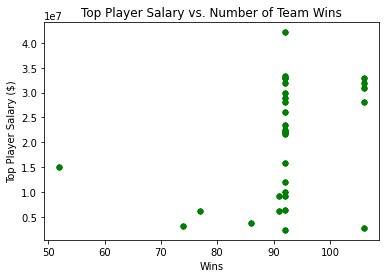

In [228]:
# VISUALIZATION 1: Top Player Salary (WEB_BB) vs. Number of Wins (API_BB) (Scatter Plot)
combined_baseball_df.plot(kind='scatter', x='Wins', y='Top Player Salary', alpha=1, color='green')
plt.xlabel('Wins')
plt.ylabel('Top Player Salary ($)')
plt.title('Top Player Salary vs. Number of Team Wins')

# Findings: You can't use Top Player Salary to predict the number of wins because there's so much variation in player salary 
# for the team same number of wins (approx)

Text(0.5, 1.0, 'Team Salary vs. Wins')

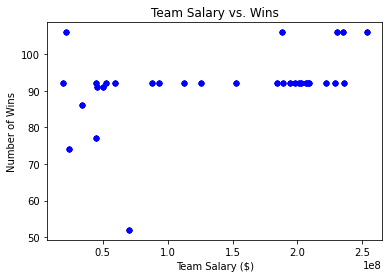

In [229]:
# VISUALIZATION 2: Team Salary (WEB_BB) vs. Wins (API_BB) (Scatter Plot)
combined_baseball_df.plot(kind='scatter', x='Highest Team Payroll', y='Wins', alpha=1, color='blue')
plt.xlabel('Team Salary ($)')
plt.ylabel('Number of Wins')
plt.title('Team Salary vs. Wins')

# As Team payroll increases, you tend to have more chances of winning, but not by much

Text(0.5, 1.0, 'Team Salary vs. Wins')

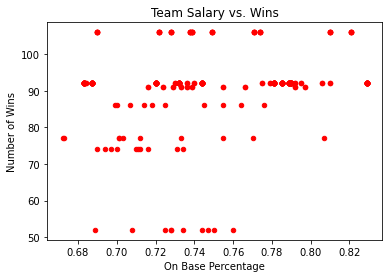

In [230]:
# VISUALIZATION 3: OBP (EXCEL_BB) vs. Wins (API_BB)
combined_baseball_df.plot(kind='scatter', x='OnBasePercentage', y='Wins', alpha=1, color='red')
plt.xlabel('On Base Percentage')
plt.ylabel('Number of Wins')
plt.title('Team Salary vs. Wins')

# Findings: On Base Percentage (number of times a team gets on base) does mean that you'll have more wins to a certain degree, 
# but only to a certain point (threshold). 

<AxesSubplot:title={'center':'Aggregate Highest Team Payroll by Teams from 1988-2020'}, ylabel='Lowest Team Payroll'>

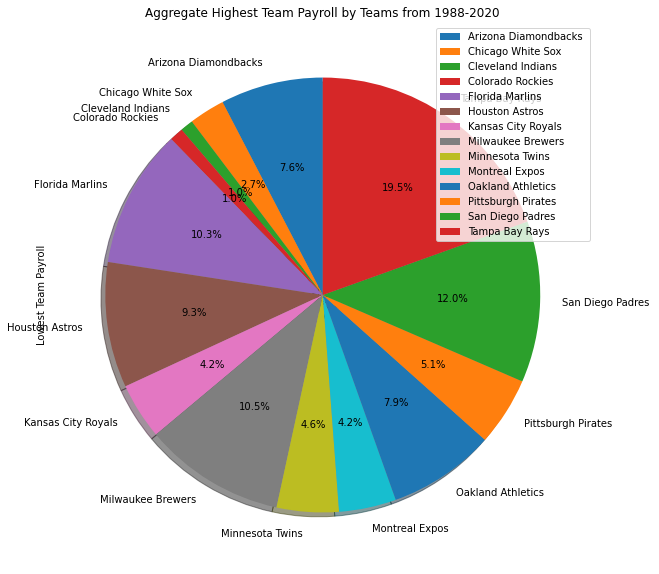

In [231]:
# VISUALIZATION 4: Pie Chart to show the the breakdown of the MLB teams' lowest payroll (WEB_BB) from 1988-2020
combined_baseball_df.groupby(['Lowest Team Name']).sum().plot(kind='pie', y='Lowest Team Payroll', title='Aggregate Highest Team Payroll by Teams from 1988-2020', shadow = True,startangle=90,figsize=(15,10), autopct='%1.1f%%')

# Findings: Of the MLB teams with the lowest payroll, the Tampa Bay Rays have the biggest and the Cleveland Indians and Colorado
# Rockies have the smallest. 

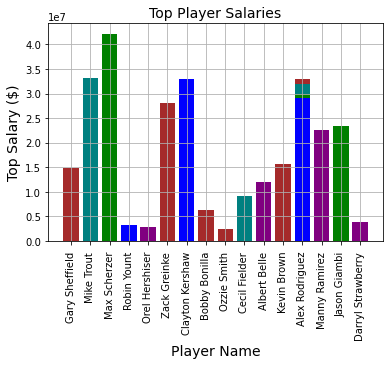

In [232]:
# VISUALIZATION 5: Bar Chart of Top Player Salaries (WEB_BB) from 1988-2020
New_Colors = ['green','blue','purple','brown','teal']
plt.bar(combined_baseball_df['Top Salary Player Name'], combined_baseball_df['Top Player Salary'], color=New_Colors)
plt.title('Top Player Salaries', fontsize=14)
plt.xlabel('Player Name', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Top Salary ($)', fontsize=14)
plt.grid(True)
plt.show()

# Findings: Max Scherzer has the highest Top Salary at $42 million/year, and Ozzie Smith has the lowest top salary at 2.5 million/year

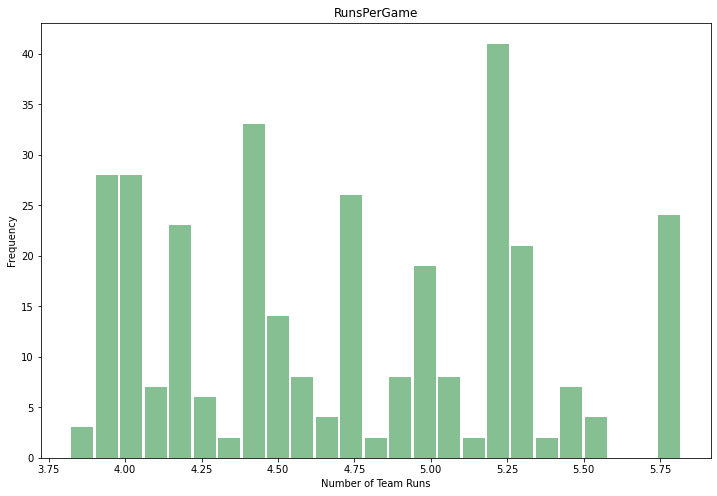

In [233]:
# VISUALIZATION 6: Histogram of Runs Per Game (EXCEL_BB)
hist = combined_baseball_df.hist(column='RunsPerGame', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

for ax in hist.flatten():
    ax.set_xlabel("Number of Team Runs")
    ax.set_ylabel("Frequency")
    
# Findings: The most amount of Teams have about 5.25 runs per game. 

Text(0.5, 1.0, 'Average Batter Age vs. Number of Team Losses')

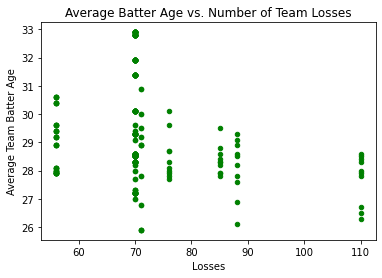

In [234]:
# VISUALIZATION 7: Losses (API_BB) and Average Batter Age (EXCEL_BB)
combined_baseball_df.plot(kind='scatter', x='Losses', y='AverageBatterAge', alpha=1, color='green')
plt.xlabel('Losses')
plt.ylabel('Average Team Batter Age')
plt.title('Average Batter Age vs. Number of Team Losses')

# Findings: At the older average team batter age (30+), there are less team losses. In younger average team batter ages (<30), 
# there tends to be variable number of losses (bigger span), however in the 110 losses category, the average team batter ages
# is less than 30, and nothing over it.

### 250-500-word summary of what you learned and had to do to complete the project. In your write-up, make sure to address the ethical implications of cleansing data and your project topic. 

In [ ]:
## Please see word document attached to the Blackboard submission